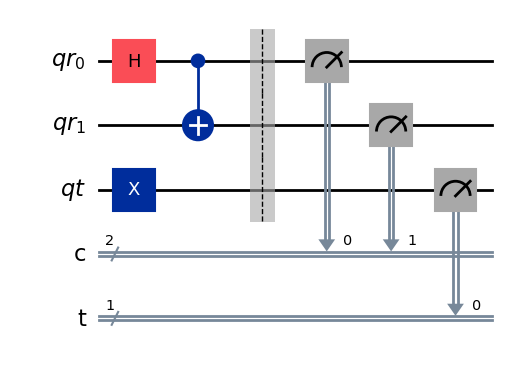

In [1]:
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister

qr = QuantumRegister(2, 'qr')
qt = QuantumRegister(1, 'qt')
cr = ClassicalRegister(2, 'c')
ct = ClassicalRegister(1, 't')
qc = QuantumCircuit(qr, qt, cr, ct)

qc.h(qr[0])
qc.x(qt)
qc.cx(qr[0], qr[1])

qc.barrier()

qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])
qc.measure(qt, ct)

qc.draw('mpl')


{'1 11': 49964, '1 00': 50036}


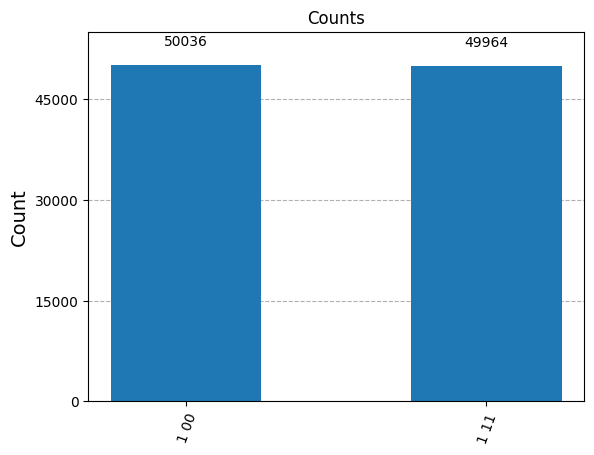

In [2]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city

simulator = AerSimulator()
circ = transpile(qc, simulator)

result = simulator.run(circ, shots=100000).result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts, title='Counts')


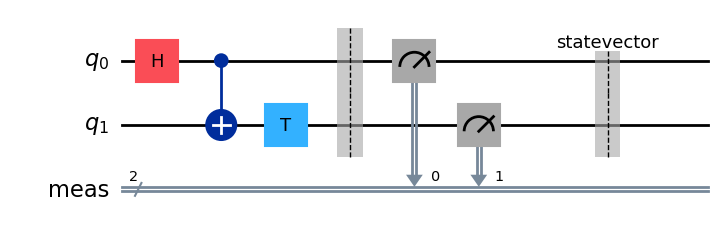

In [3]:
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.t(1)
circ.measure_all()
circ.save_statevector()

circ.draw('mpl')

{'00': 514, '11': 510}
[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


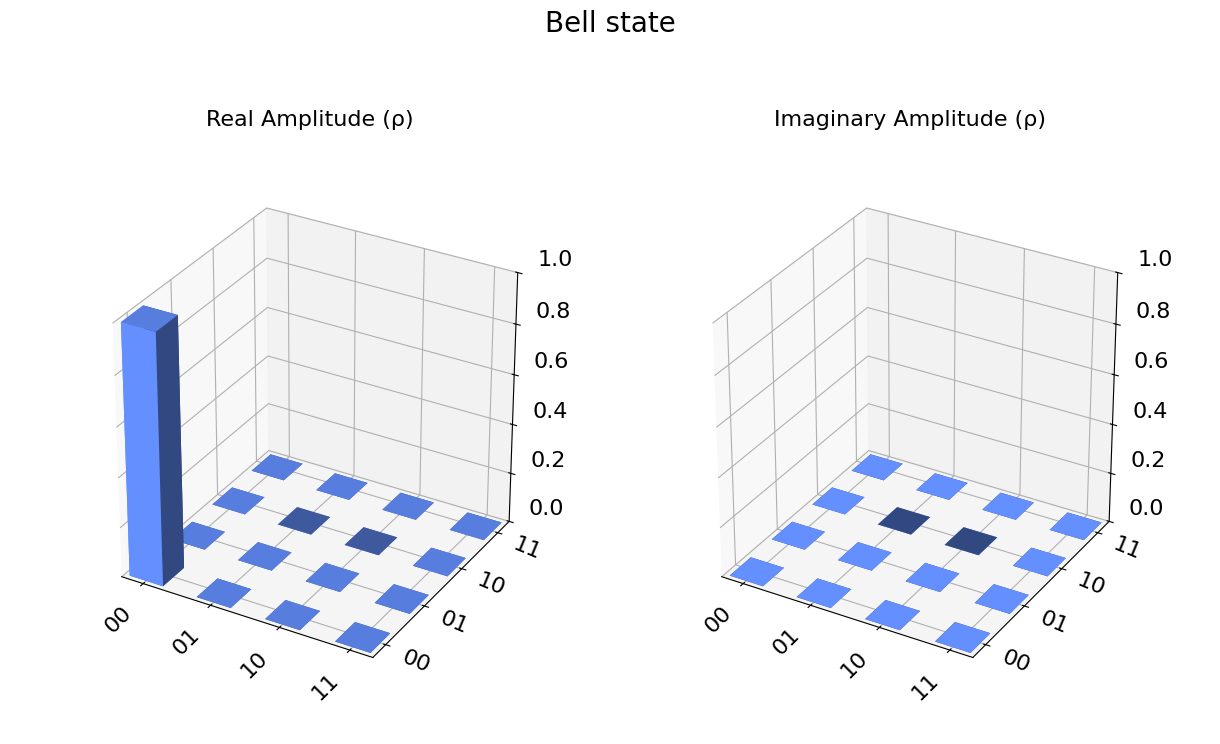

In [4]:
# Transpile for simulator
simulator = AerSimulator()
circ = transpile(circ, simulator)

# Run and get statevector
result = simulator.run(circ).result()
print(result.get_counts(circ))
statevector = result.get_statevector(circ)
print(statevector.data)
plot_state_city(statevector, title='Bell state', figsize=(12, 8))